In [1]:
import time
import numpy as np
import pandas as pd
from PIL import Image
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Dataset 2- German Traffic Sign Detection Benchmark Dataset


## 2.a

This is the second dataset explored in the project. It is an imaging dataset that contains around 50,000 images, each belonging to one of the 43 classes. <br>

The methods selected for this dataset are Support Vector Machines, K-Nearest Neighbor, and Logistic Regression. 

In [2]:
## Importing the Dataset ##

# using the paths from the provided CSV
img_path = pd.read_csv('Dataset2/Train.csv')

In [3]:
img_path

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


Luckily, the provided data already came with separated Training and Test data, so all that needs to be done for it is create separate dataframes for them. 

## 2.b Pre Processing

Pre processing images takes some elbow grease to get done, but it is not as simple as just uploading an image. To the layman, handling data and processing models seem like magic, just upload an image to an algorithm and done. Unfortunately, it is not that simple. The image has to be converted in a form that is numerical so that it can be understood by the machine. For this, the images in each class will be converted into vectors. <br>

In order to conver the images to vectors, all the images will need to be resized. The images come in all various different sizes, so they all need to be kept at the same size so that the vectors have all the same dimensionality. For this, the images in each class will be rezied to a 28x28 image, so that dimensionality of each image when converted to a vector can be 784. 

In [4]:
img_path_list = []
for i in range(len(img_path)):
    img_path_list.append(('Dataset2/'+str(img_path['Path'][i])))

First, there has to be a way to reach the images considering they are in different directories, this allows us to set up list that contains the path name of the images in every class. 

In [5]:
## Transforming Images to Vectors ##
img_train = [] # list of the image vector values
for filename in img_path_list :
    im = Image.open(filename).convert('L').resize((20,20)) # conver image to grayscale resize image to be 20x20 pixels
    img_vec = np.ravel(im) # convert the image into a 1-D array
    img_train.append(img_vec) # put the array in a list

By using np.ravel<sup>[3]</sup> the image can be turned into a 1-D array

In [6]:
img_dataset = pd.DataFrame(img_train) # convert list to pandas dataframe
img_dataset['Class'] = img_path['ClassId'] # adds class to the dataset for shuffling
img_dataset = img_dataset.sample(frac=1).reset_index(drop=True) # shuffle the dataset
img_dataset

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Class
0,14,15,14,14,16,14,12,14,14,11,...,16,17,19,22,18,11,11,12,10,8
1,44,46,54,77,79,60,154,172,86,112,...,63,56,63,69,80,76,60,58,58,1
2,33,40,36,31,29,30,31,30,32,33,...,122,145,154,145,173,122,54,30,35,10
3,59,53,59,65,45,35,46,67,70,78,...,56,37,28,27,22,21,21,21,21,11
4,21,21,20,18,18,18,21,22,23,26,...,25,20,18,18,18,18,18,17,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39204,160,160,160,161,160,162,161,162,161,162,...,22,35,39,31,30,28,28,27,27,11
39205,211,168,151,198,196,254,237,163,196,235,...,247,255,255,255,255,232,156,134,196,25
39206,255,255,253,255,255,222,248,248,133,131,...,82,94,125,132,76,45,63,52,58,11
39207,41,44,48,43,39,45,58,58,38,28,...,63,54,62,49,43,40,38,45,48,22


In [7]:
X = img_dataset.iloc[:,0:400]
Y = img_dataset['Class']

In [8]:
X = X.to_numpy() # turn dataframe into a numpy array -> easier to work with
print(X)
print("\n",X.shape)

[[ 14  15  14 ...  11  12  10]
 [ 44  46  54 ...  60  58  58]
 [ 33  40  36 ...  54  30  35]
 ...
 [255 255 253 ...  63  52  58]
 [ 41  44  48 ...  38  45  48]
 [ 58 154 191 ... 130  74  51]]

 (39209, 400)


With this, the data has now transformed each image into a vector. Each sample in the dataset is an image vector. 

## 2.c Feature Extraction

For feature extraction, PCA should be done in order to reduce the dimensionality of our dataset. Currently, there are 400 raw features. In order to make analizing the data faster, and easier. Since there are separate test and training datasets, PCA will be conducted on both.

Text(0.5, 0.91, '90% capture')

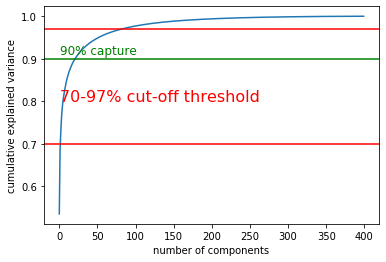

In [9]:
pca = PCA().fit(X.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axhline(y=0.9, color='g', linestyle='-') # capture 90% of the energy 
plt.text(0.5, 0.8, '70-97% cut-off threshold', color = 'red', fontsize=16)
plt.text(0.5, 0.91, '90% capture', color = 'green', fontsize=12)

From these graphs, it is visible just how much the dimensionality of the data can be reduced greatly while still retaining a majority of the information in our dataset. If the data wants to capture 90% of the information, it will reduce from 400 features to somewhere around 25 features for both the training and testing dataset. While capturing 90% of the information is good, capturing 97% of the information is even better. While it might make our methods not as fast, it is a good trade off for better results. 

In [10]:
## PCA on Training Data ##
X_pca = skldecomp.PCA(n_components=0.97, svd_solver='full')
pca_X = X_pca.fit_transform(X)
print("PCA on Training Dataset: ",pca_X.shape)

PCA on Training Dataset:  (39209, 83)


## 2.d Processing the Datasets

As mentioned previously, the machine learning methods that will be employed for this dataset will be:
- Support Vector Machines (SVM)
    - SVM was chosen bevause of the the way it finds optimal boundaries between the outputs. More indepth, SVC will be used in order to allow for some support vector margin violation
- K-Nearest Neighbor (KNN)
    - Assumption that if the samples contain the same image, there should be some similarity and thus be close to each other.
- Logistic Regression (LR)
    - Another linear classifier that separates multiple classes. Similar to Maximum A Posteriori (MAP) classifiers as it relies on prior probabilities to classify. 

### 2.d.i Support Vector Machines (SVM)

The first method that will be utilized is the Support Vector Machine classifier. SVMs are linear classifierss that correspond to a hyperplane define by: <br>
<center>$f(x) = $<b>w</b> <sup>T</sup> <b>x</b>$ + b = 0$ </center>

In the case of Binary Classification, with the labels as {1,-1}:
<center>
    $f(x) > 0 $ ->$ y = 1 $<br>
    $f(x) < 0 $->$ y = -1 $
</center>

For multiclass classification, this can work in a similar fashion. If one uses SVM with One vs Rest classification, it extends Binary Classification to Multiclass. <br>

SVM is normally a hard-margin classifier, meaning that it does not allow for any margin violations. This is not wanted as there could be some potential margin violations caused by the samples, so the SVM will instead use a Soft Margin Classifier known as SVC, which is the same as SVM but allows for support vector magin violations. Since there could potentially be cases of margin violation due to the dataset, it is best to account for that and tune the hyperparameters. <br>

By using a method from sklearn called pipeline<sup>[6][7][8]</sup>, the process for SVC can be made faster

In [11]:
svc_X_train, svc_X_test,svc_Y_train, svc_Y_test = train_test_split(pca_X, Y, test_size=0.2)

# pipelines allow to stick multiple processes into a single scikit estimator. It uses the same features as normal estimators
# such as fit, and predict

t0_svc = time.time()
# named after the 1995 Prince Album The Gold Experience
golden_experience = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# SVC by default uses One Vs Rest Classification, Radial basis function kernel. All values were kept at default


golden_experience.fit(svc_X_train, svc_Y_train)
svc_pred = golden_experience.predict(svc_X_test)
svc_time = time.time() - t0_svc

print("Run time:",svc_time)
svc_cm = confusion_matrix(svc_Y_test, svc_pred)
svc_cr = classification_report(svc_Y_test, svc_pred)
print("Classification Report\n",svc_cr)
accuracy_svc = accuracy_score(svc_Y_test, svc_pred)
print('SVC Accuracy:',accuracy_svc)

Run time: 104.10768032073975
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        45
           1       0.88      0.93      0.90       452
           2       0.93      0.90      0.92       470
           3       0.83      0.86      0.85       254
           4       0.85      0.93      0.89       401
           5       0.78      0.89      0.83       367
           6       0.93      0.99      0.96        82
           7       0.91      0.84      0.87       298
           8       0.77      0.90      0.83       289
           9       0.99      0.92      0.95       303
          10       0.95      0.97      0.96       412
          11       0.88      0.96      0.92       260
          12       0.76      0.97      0.85       419
          13       0.95      0.98      0.97       402
          14       0.99      0.95      0.97       147
          15       0.97      0.89      0.92       131
          16       1.00      

### 2.d.ii K-Nearest Neighbor (KNN)

KNN is a MAP Classifier that is the best under 0-1 loss. It utilizes a distance metric in order to measure distance between datapoints in *p* dimensions. Additionally, it uses a mechanism to define a neighborhood around a point. Mathematically, the KNN estimate is:
<center> $l_hat = argmax \frac{1}{k}\sum 1_{y_i = l} $</center>
in which <b>1</b> is the 0-1 loss. <br>

Essentially, for any given **x**, it belongs to the class which has a majority in its neighborhood. <br>

K-Fold cross validation with K = 7 was used for both checking performance and splitting the data into training and test data

In [12]:
knn_run_time = [] # list of time for each iteration
knn_conf_matrix = [] # list of the confusion matrices for each iteration
knn_accuracy = [] # list of the accuracy for each iteration

knn_kfold = KFold(n_splits=7,shuffle=True) # initialize the kfold cross validation
for knn_train_index, knn_test_index in knn_kfold.split(pca_X,Y):
    knn_X_train, knn_X_test = pca_X[knn_train_index], pca_X[knn_test_index] # Training Data, Test Data
    knn_y_train, knn_y_test = Y[knn_train_index], Y[knn_test_index] # Training Data, Test Data
    t0_knn = time.time()
    red_hot_chili_peppers = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # named after the 1983 band RHCP
    red_hot_chili_peppers.fit(knn_X_train,knn_y_train) # fit to the KNN Classifier
    knn_pred = red_hot_chili_peppers.predict(knn_X_test) # predict class
    knn_time = time.time()-t0_knn
    knn_run_time.append(knn_time)
    knn_cm = confusion_matrix(knn_y_test, knn_pred) # confusion matrix
    knn_conf_matrix.append(knn_cm)
    knn_cr = classification_report(knn_y_test, knn_pred) # classification report - shows main classification metrics
    accuracy_knn = accuracy_score(knn_y_test, knn_pred) # accuracy
    knn_accuracy.append(accuracy_knn)

average_knn_accuracy = sum(knn_accuracy)/7
print("Average Accurary:",average_knn_accuracy)
print("Classification Report\n",knn_cr)
average_knn_time = sum(knn_run_time)/7
print("Average run time after doing 5-fold Cross Validation:", average_knn_time)

Average Accurary: 0.8171592867513121
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.75      0.86      0.81       311
           2       0.73      0.80      0.76       315
           3       0.67      0.69      0.68       194
           4       0.79      0.82      0.80       271
           5       0.67      0.81      0.73       300
           6       0.89      0.92      0.91        53
           7       0.65      0.80      0.71       201
           8       0.75      0.81      0.78       203
           9       0.93      0.81      0.87       202
          10       0.84      0.85      0.84       258
          11       0.84      0.84      0.84       185
          12       0.90      0.77      0.83       305
          13       0.90      0.92      0.91       300
          14       0.95      0.74      0.84       113
          15       0.81      0.64      0.72        84
          16       0.

### 2.d.iii Logistic Regression (LR)

Logistic Regression is a classifier that estimates the posterior probabilities from the data. The goal is to estimate a normal vector and bias in order to minimize the logistic loss. 

Making use of pipelines<sup>[6]</sup> again in order to complete mu

In [13]:
LR_X_train, LR_X_test,LR_Y_train, LR_Y_test = train_test_split(pca_X, Y, test_size=0.2)

# named after Queen Song - Made in Heaven
LR_t0 = time.time()
made_in_heaven = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
# solver='sag' works for multiclass problems, uses l2 penalty 
# using One Vs Rest classifer as it is more efficient than One vs One Classification -> ( O(L^2) )

made_in_heaven.fit(LR_X_train, LR_Y_train)
LR_pred = made_in_heaven.predict(LR_X_test)
LR_time = time.time() - LR_t0

print("Run time:",LR_time)
LR_cm = confusion_matrix(LR_Y_test, LR_pred)
LR_cr = classification_report(LR_Y_test, LR_pred)
print("Classification Report\n",LR_cr)
accuracy_LR = accuracy_score(LR_Y_test, LR_pred)
print('LR Accuracy:',accuracy_LR)

Run time: 25.217877864837646
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.51      0.71      0.59       430
           2       0.54      0.55      0.55       457
           3       0.44      0.20      0.27       276
           4       0.62      0.60      0.61       390
           5       0.50      0.15      0.23       356
           6       1.00      0.02      0.04        94
           7       0.75      0.36      0.49       324
           8       0.65      0.35      0.45       277
           9       0.66      0.85      0.74       309
          10       0.38      0.94      0.54       405
          11       0.62      0.86      0.72       265
          12       0.60      0.79      0.68       414
          13       0.58      0.97      0.73       449
          14       0.77      0.89      0.83       154
          15       1.00      0.12      0.22       136
          16       1.00      

c:\users\robert\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.e Comparative Analysis

In [14]:
print("SVC run time:",svc_time)
print("Average KNN run time:", average_knn_time)
print("Logistic Regression run time:",LR_time)

SVC run time: 104.10768032073975
Average KNN run time: 8.491797004427228
Logistic Regression run time: 25.217877864837646


From the run time of the three methods, there is a large difference between the fastest and the slowest ones. For SVC is lasts 104 seconds, almost 2 minutes. This can be due to the training Time Complexity of SVM being $ O(nd^2)$ if d<n where d is the dimension and n are the number of data points<sup>[9]</sup>. 

[[ 28  16   0 ...   0   0   0]
 [  0 422   8 ...   0   0   0]
 [  0   3 424 ...   0   0   0]
 ...
 [  0   4   0 ...  57   0   0]
 [  0   0   0 ...   0  31   0]
 [  0   1   0 ...   0   0  31]]


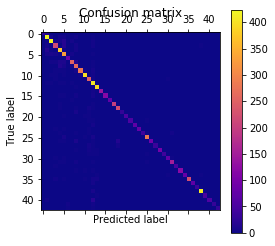

In [15]:
print(svc_cm)

plt.matshow(svc_cm, cmap= 'plasma') # using the plasma cmap color for easier visualization between the shades of color
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[ 151   17    2 ...    0    0    0]
 [  10 1887   75 ...    9    1    0]
 [   8  102 1764 ...   13    0    0]
 ...
 [   1    7   12 ...  267    0    0]
 [   0    3    6 ...    0  188    0]
 [   0    2    3 ...    1    0  186]]


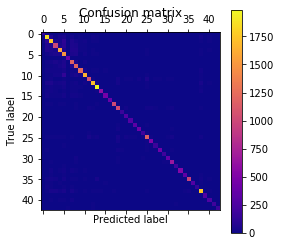

In [16]:
overall_conf_knn = sum(knn_conf_matrix ) # overall GNB confusion matrix 

print(overall_conf_knn)

plt.matshow(overall_conf_knn, cmap= 'plasma') # using the plasma cmap color for easier visualization between the shades of color
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[  0  36   0 ...   0   0   0]
 [  0 304  30 ...   0   0   0]
 [  0  80 253 ...   0   0   0]
 ...
 [  0   2   0 ...   4   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]


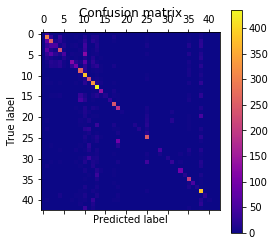

In [17]:
print(LR_cm)

plt.matshow(LR_cm, cmap= 'plasma') # using the plasma cmap color for easier visualization between the shades of color
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

From the confusion matrix, one can visually see how the classification is working out for each method. The confusion matric for LR seems to have more misclassification than the other two. 

In [18]:
print('SVC Accuracy:',accuracy_svc)
print("Average KNN Accurary:",average_knn_accuracy)
print('LR Accuracy:',accuracy_LR)

SVC Accuracy: 0.9107370568732466
Average KNN Accurary: 0.8171592867513121
LR Accuracy: 0.5776587605202754


Finally, the accuracy of the three classification methods used. From this, it is very clear which classification method classified best, and it was SVC with 91% accuracy, with KNN having 81% and finally LR with only being accurate just about 58% of the time. <br>

Making a decision on which method is the most effection, is not an easy one in this case. While SVC seems like the best method due to its accuracy, it has a was longer run time than either of the other two. For this one, while it's accuracy is only 10% less than SVC, its way faster than SVC. KNN is a relatively good choice for this dataset, and should be the one that is chosen. 

## 2.f Ethical Issues

Imaging datasets are very prone to biases, and need to be carefully trained so that it can classify effectively. If it is not carefully trained, then it can lead bad performance and, inadvertly, lead to a form of discrimination. In some imaging dataset, if pictures of light skinned individuals are fed more than dark skinned faces, then the model will be worse at recognizing darker skinned faced <sup>[11]</sup>. If not trained correctly, it can show up abruptly in places one would not think, such as social media. Twitter had an issue of this nature recently, in which it could crop to the lighter skinned individuals no matter the way the images were layed out<sup>[13]</sup>. While it was most likely not purposely done, this is an example of how a model needs to be carefully trained in order to avoid these kinds of issues. Steps need to be taken to ensure that algorithm are fair and without discrimination. <br>

While discrimination is a big issue, another major issue is, in the form of something similar to this dataset, is if something of this nature is adapted into self driving vehicles. There are already reports of self driving vehicles that get into fatal accidents<sup>[12]</sup>. With a model similar to this one, an ML engineer has to ensure that it can classify correctly at least 99% of the time, with some failsafe for the 1% of the time it does not accurately detect. In the event that a vehicle potentially equiped with self driving is not able to recognize a street sign, wether its a speed sign, a stop sign, or a pedestrian crossing, it could pose a danger to a lot of people and put many lives at risk. <br>




## 2.g References used in this Dataset

1)<br>
Pulkit SharmaMy research interests lies in the field of Machine Learning and Deep Learning. Possess an enthusiasm for learning new skills and technologies. “Build Multi Label Image Classification Model in Python.” Analytics Vidhya, 30 Nov. 2020, https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/. 

2)<br>
Aly, Walid. “Which Image Resolution Should I Use for Training for Deep Neural Network?” ResearchGate, 7 Oct. 2016, https://www.researchgate.net/post/Which_Image_resolution_should_I_use_for_training_for_deep_neural_network.

3)<br>
Ofir AttiaOfir Attia 1, et al. “Convert Image ( Png ) To Matrix And Then To 1D Array.” Stack Overflow, 1 Apr. 2018, https://stackoverflow.com/questions/15612373/convert-image-png-to-matrix-and-then-to-1d-array. 

4)<br>
Subasi, Caglar. “LOGISTIC REGRESSION CLASSIFIER.” Medium, Towards Data Science, 2 Apr. 2019, https://towardsdatascience.com/logistic-regression-classifier-8583e0c3cf9.

5)<br>
Sheth, Vatsal. “MultiClass Classification Using K-Nearest Neighbours.” Medium, Towards Data Science, 9 Nov. 2020, https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76.

6)<br>
Nooney, Kartik. “Deep Dive into Multi-Label Classification..! (With Detailed Case Study).” Medium, Towards Data Science, 12 Feb. 2019, https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff. 

7)<br>
Vickery, Rebecca. “A Simple Guide to Scikit-Learn Pipelines.” Medium, Vickdata, 26 July 2019, https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf.

8)<br>
“Sklearn.pipeline.Pipeline¶.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html. 

9)<br>
Banerjee, Alekhyo. “Computational Complexity of SVM.” Medium, Medium, 31 Aug. 2020, alekhyo.medium.com/computational-complexity-of-svm-4d3cacf2f952. 

10)<br>
“What Do We Do About the Biases in AI?” Harvard Business Review, 25 Oct. 2019, https://alekhyo.medium.com/computational-complexity-of-svm-4d3cacf2f952.

11)<br>
Hao, Karen. “This Is How AI Bias Really Happens-and Why It's so Hard to Fix.” MIT Technology Review, MIT Technology Review, 2 Apr. 2020, www.technologyreview.com/2019/02/04/137602/this-is-how-ai-bias-really-happensand-why-its-so-hard-to-fix/.